In [ ]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [380]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [353]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [354]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [355]:
diabetes_dataset.shape

(768, 9)

In [356]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [357]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [358]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [359]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [360]:
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [361]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [362]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [363]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, stratify=target, random_state=2)

In [364]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [365]:
scaler = StandardScaler()

In [366]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [367]:
print(X_train_scaled)

[[-1.13796489 -0.07971099 -3.5556072  ...  0.02825037 -0.98159708
  -0.7885233 ]
 [ 0.64067858 -0.52091877  0.02549599 ... -0.17184452 -1.03823795
   0.31879426]
 [-0.84152431  2.12632792 -0.48609018 ... -0.25938604 -0.21545477
   2.19271628]
 ...
 [ 2.12288146 -1.15121561  0.23013046 ... -0.25938604 -0.50760242
   0.14843771]
 [ 0.04779742 -0.30031488  0.43476492 ...  0.90366551 -0.69839272
   0.40397253]
 [-1.13796489 -1.11970076 -0.07682125 ...  0.45345201 -0.69243053
  -0.70334503]]


In [368]:
# training the model
model = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [369]:
#training the model with the scaled data
model.fit(X_train_scaled, Y_train)

In [370]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [371]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [372]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [373]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


In [374]:
input_data = (2, 110, 92, 0, 0, 37.6, 0.191, 30) # Example input data (replace with your desired input)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Convert the NumPy array back to a pandas DataFrame with feature names
input_data_df = pd.DataFrame(input_data_reshaped, columns=features.columns)

# standardize the input data
std_data = scaler.transform(input_data_df)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54508373 -0.36334457  1.15098556 -1.29075209 -0.70188945  0.67855876
  -0.83254215 -0.27745366]]
[0]
The person is not diabetic


In [375]:
input_data = (8, 183, 64, 0, 0, 23.3, 0.672, 32) # Example input data for a diabetic case

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Convert the NumPy array back to a pandas DataFrame with feature names
input_data_df = pd.DataFrame(input_data_reshaped, columns=features.columns)

# standardize the input data
std_data = scaler.transform(input_data_df)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.23355973  1.93723887 -0.28145571 -1.29075209 -0.70188945 -1.10978932
   0.60136622 -0.10709711]]
[1]
The person is diabetic


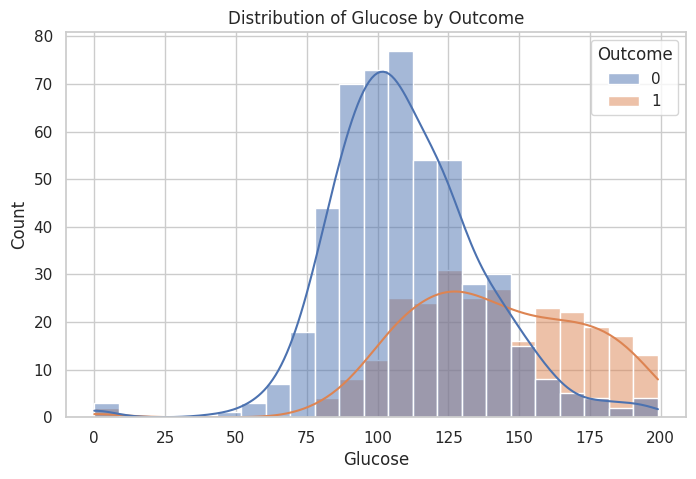

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create distribution plots for key features
features_to_plot = ['Glucose', 'BMI', 'Age', 'Pregnancies']

# Plot the first feature
feature = features_to_plot[0]
plt.figure(figsize=(8, 5))
sns.histplot(data=diabetes_dataset, x=feature, hue='Outcome', kde=True)
plt.title(f'Distribution of {feature} by Outcome')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

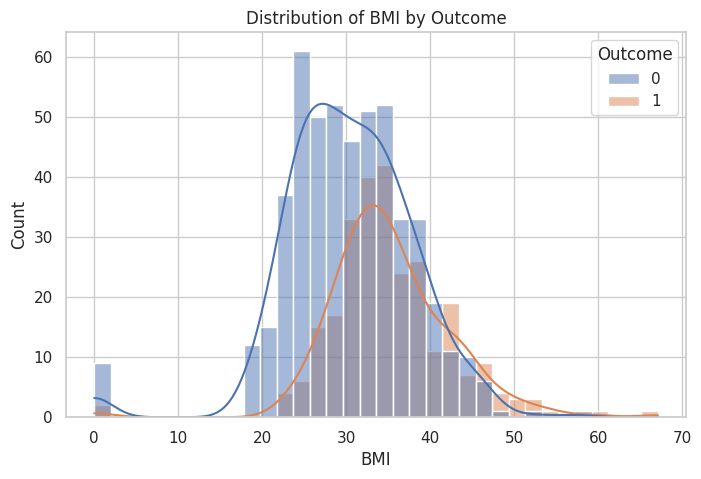

In [377]:
# Plot the second feature
feature = features_to_plot[1]
plt.figure(figsize=(8, 5))
sns.histplot(data=diabetes_dataset, x=feature, hue='Outcome', kde=True)
plt.title(f'Distribution of {feature} by Outcome')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

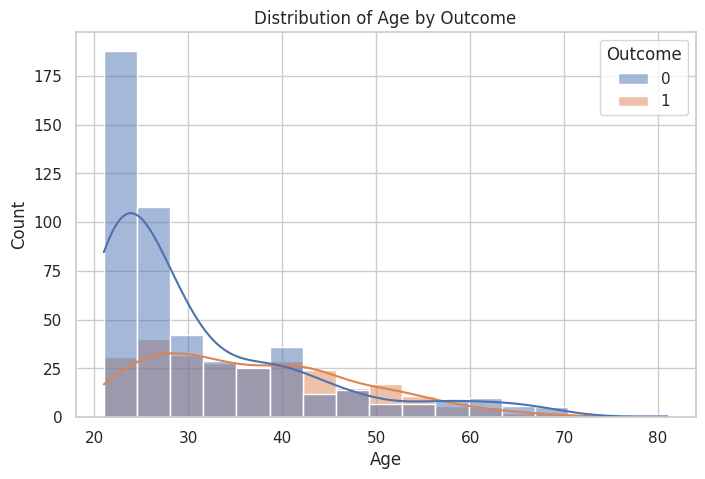

In [378]:
# Plot the third feature
feature = features_to_plot[2]
plt.figure(figsize=(8, 5))
sns.histplot(data=diabetes_dataset, x=feature, hue='Outcome', kde=True)
plt.title(f'Distribution of {feature} by Outcome')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

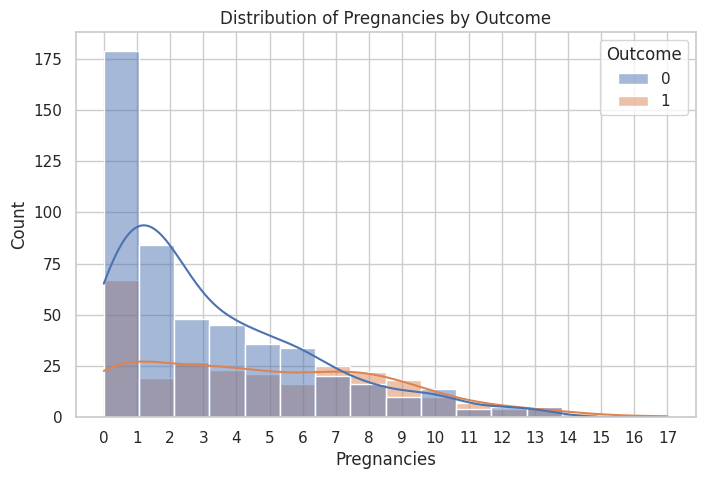

In [379]:
# Plot the fourth feature
feature = features_to_plot[3]
plt.figure(figsize=(8, 5))
sns.histplot(data=diabetes_dataset, x=feature, hue='Outcome', kde=True)
plt.title(f'Distribution of {feature} by Outcome')
plt.xlabel(feature)
plt.ylabel('Count')
plt.xticks(np.arange(0, diabetes_dataset[feature].max() + 1, 1)) # Set x-axis ticks to integers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}')) # Set formatter to display integers
plt.show()